PROBLEM STATEMENT: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Shape of your Data Set loaded: (400, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set


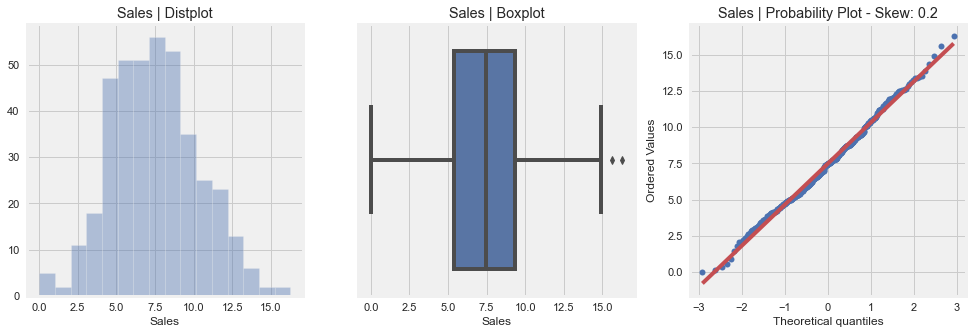

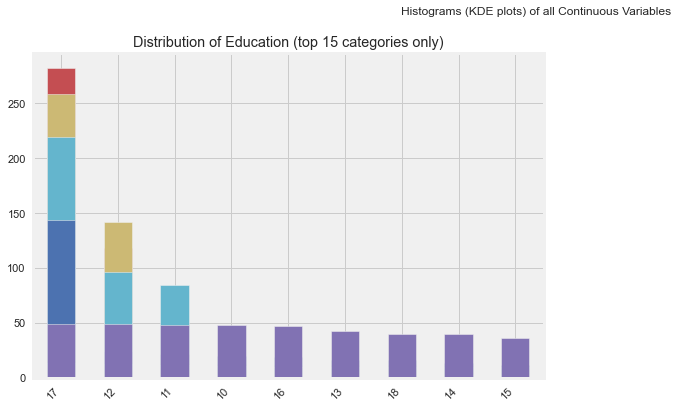

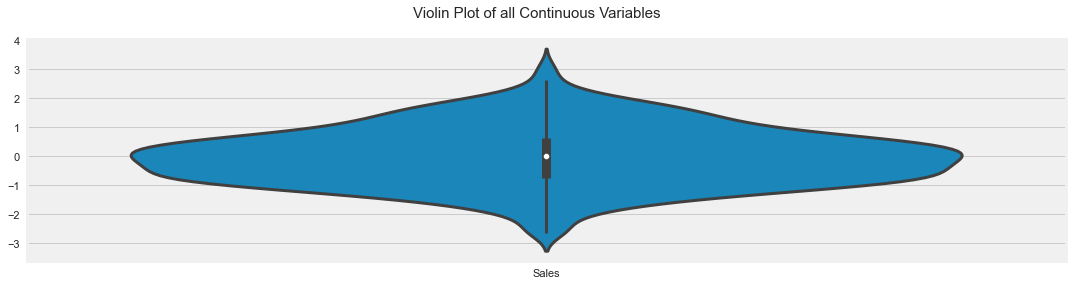

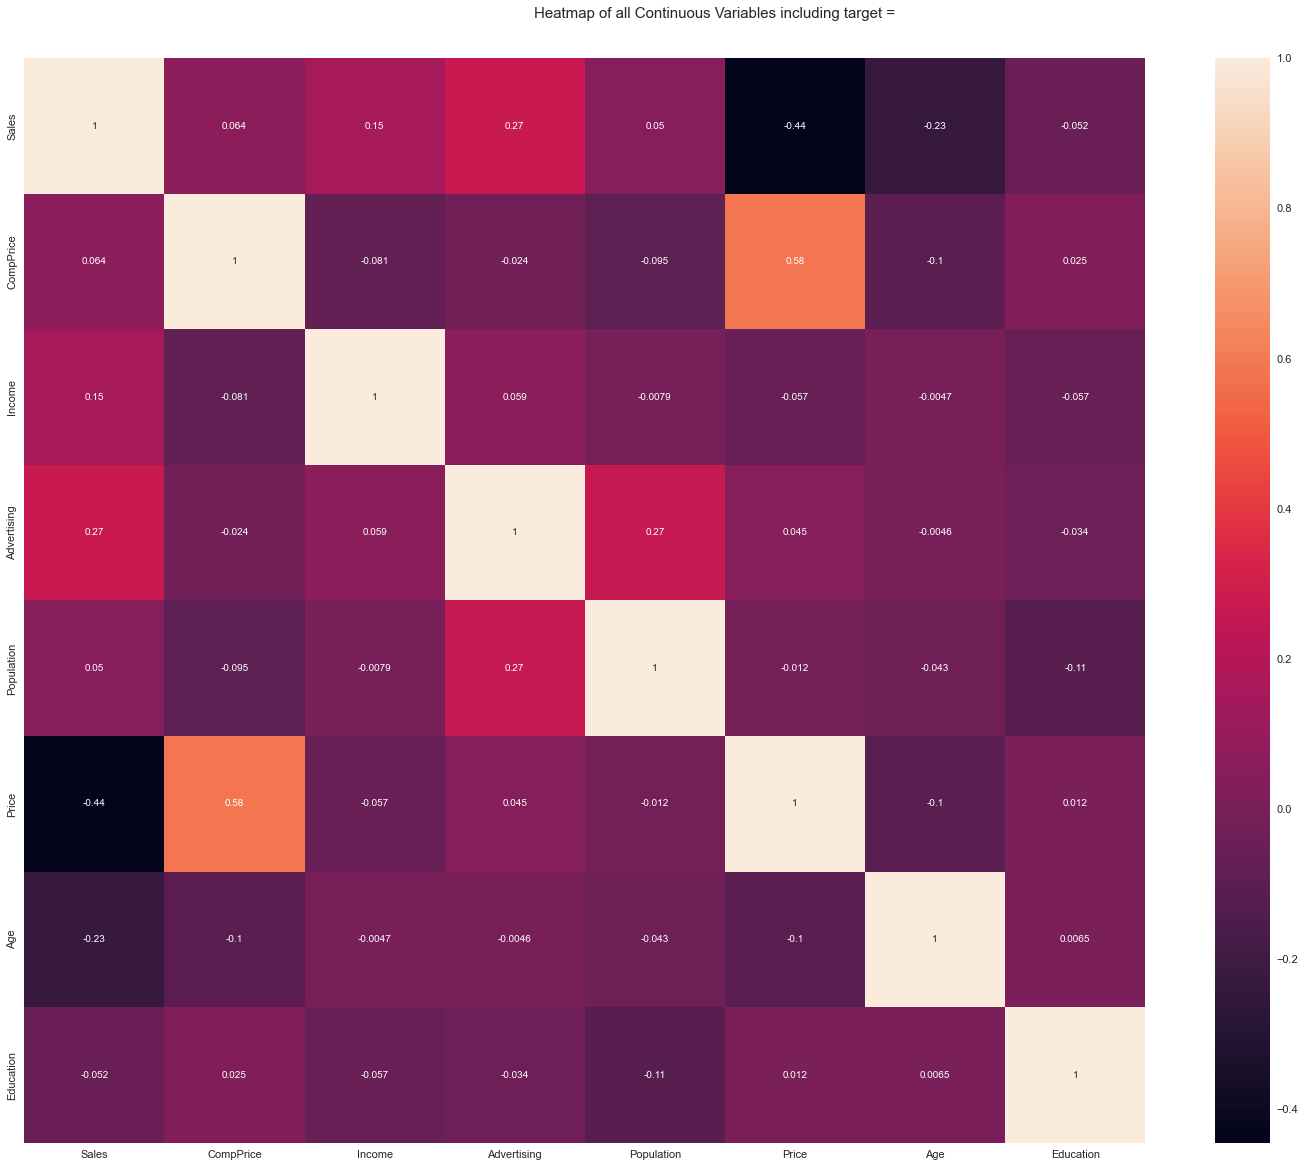

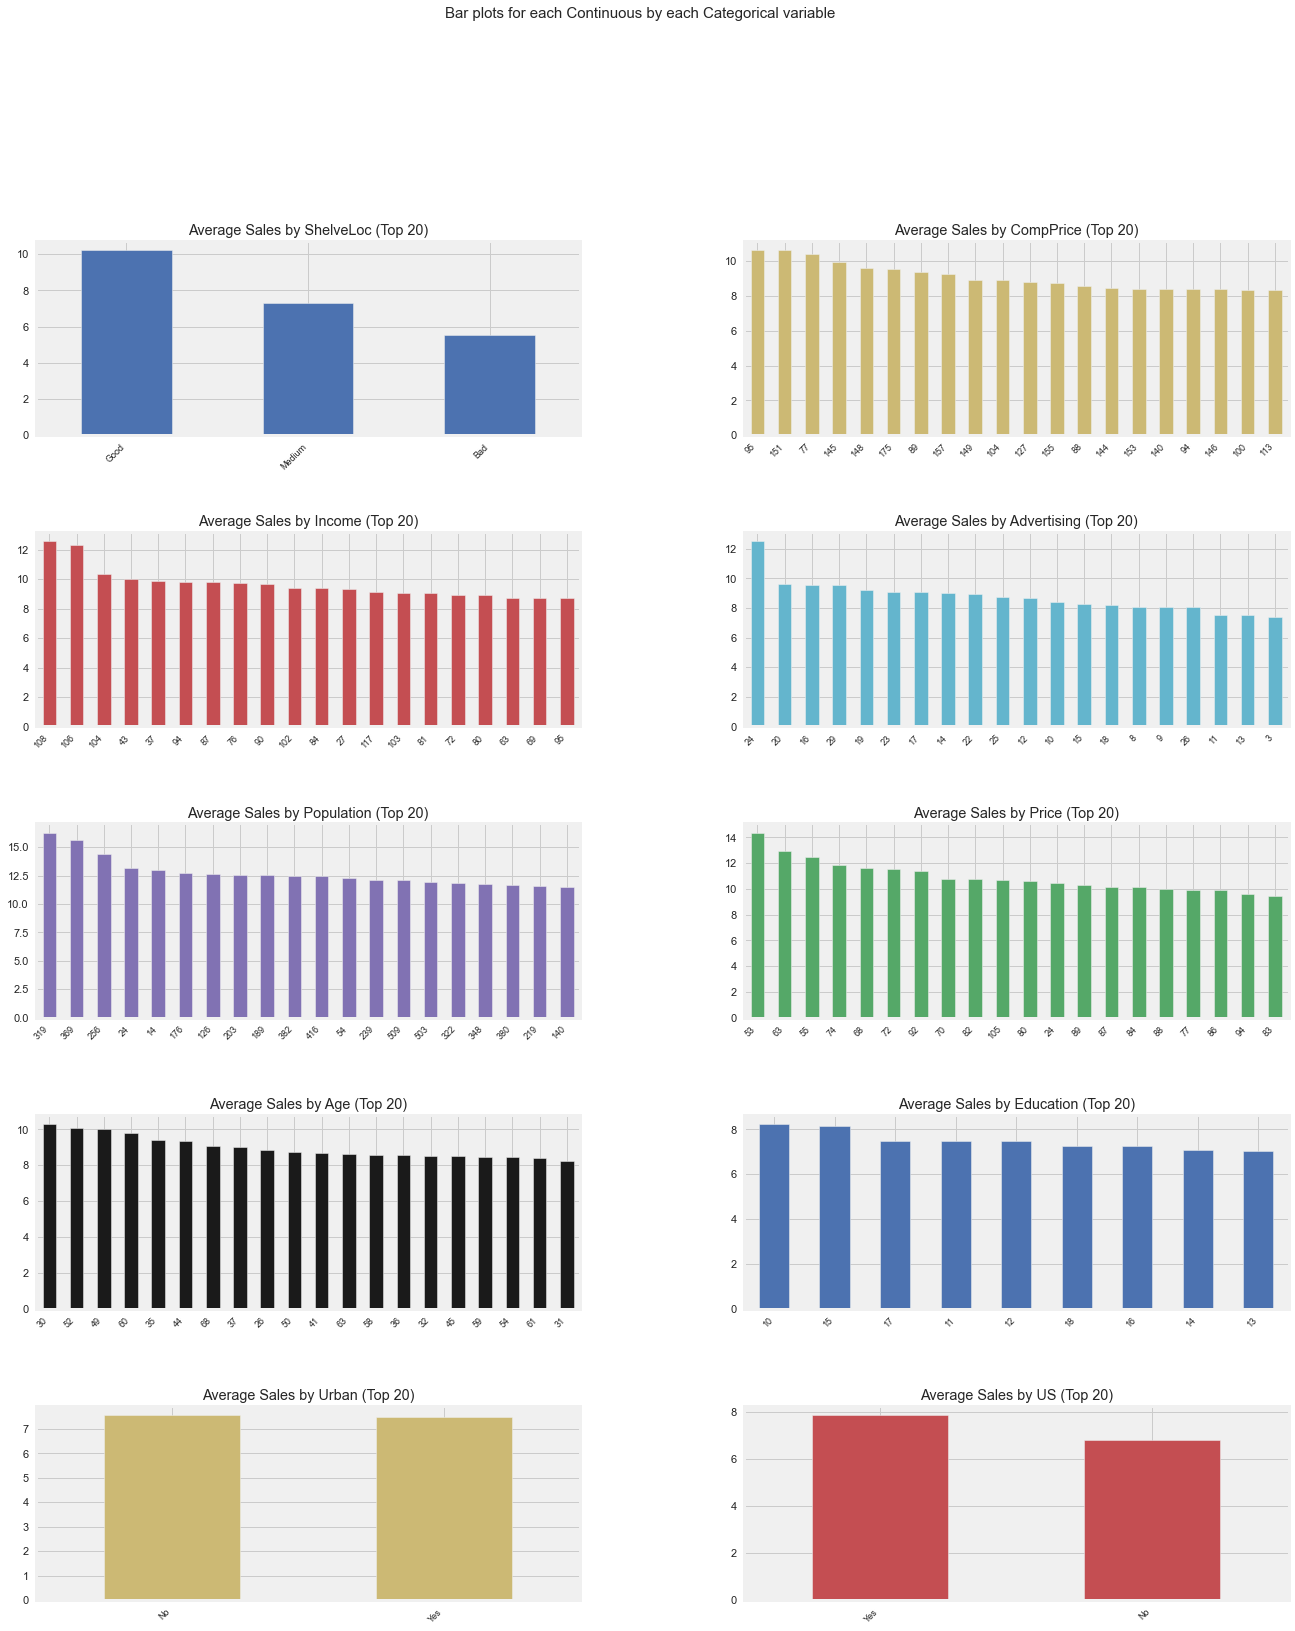

Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [11]:
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class 
AV=AutoViz_Class()
viz=AV.AutoViz('Company_Data.csv')

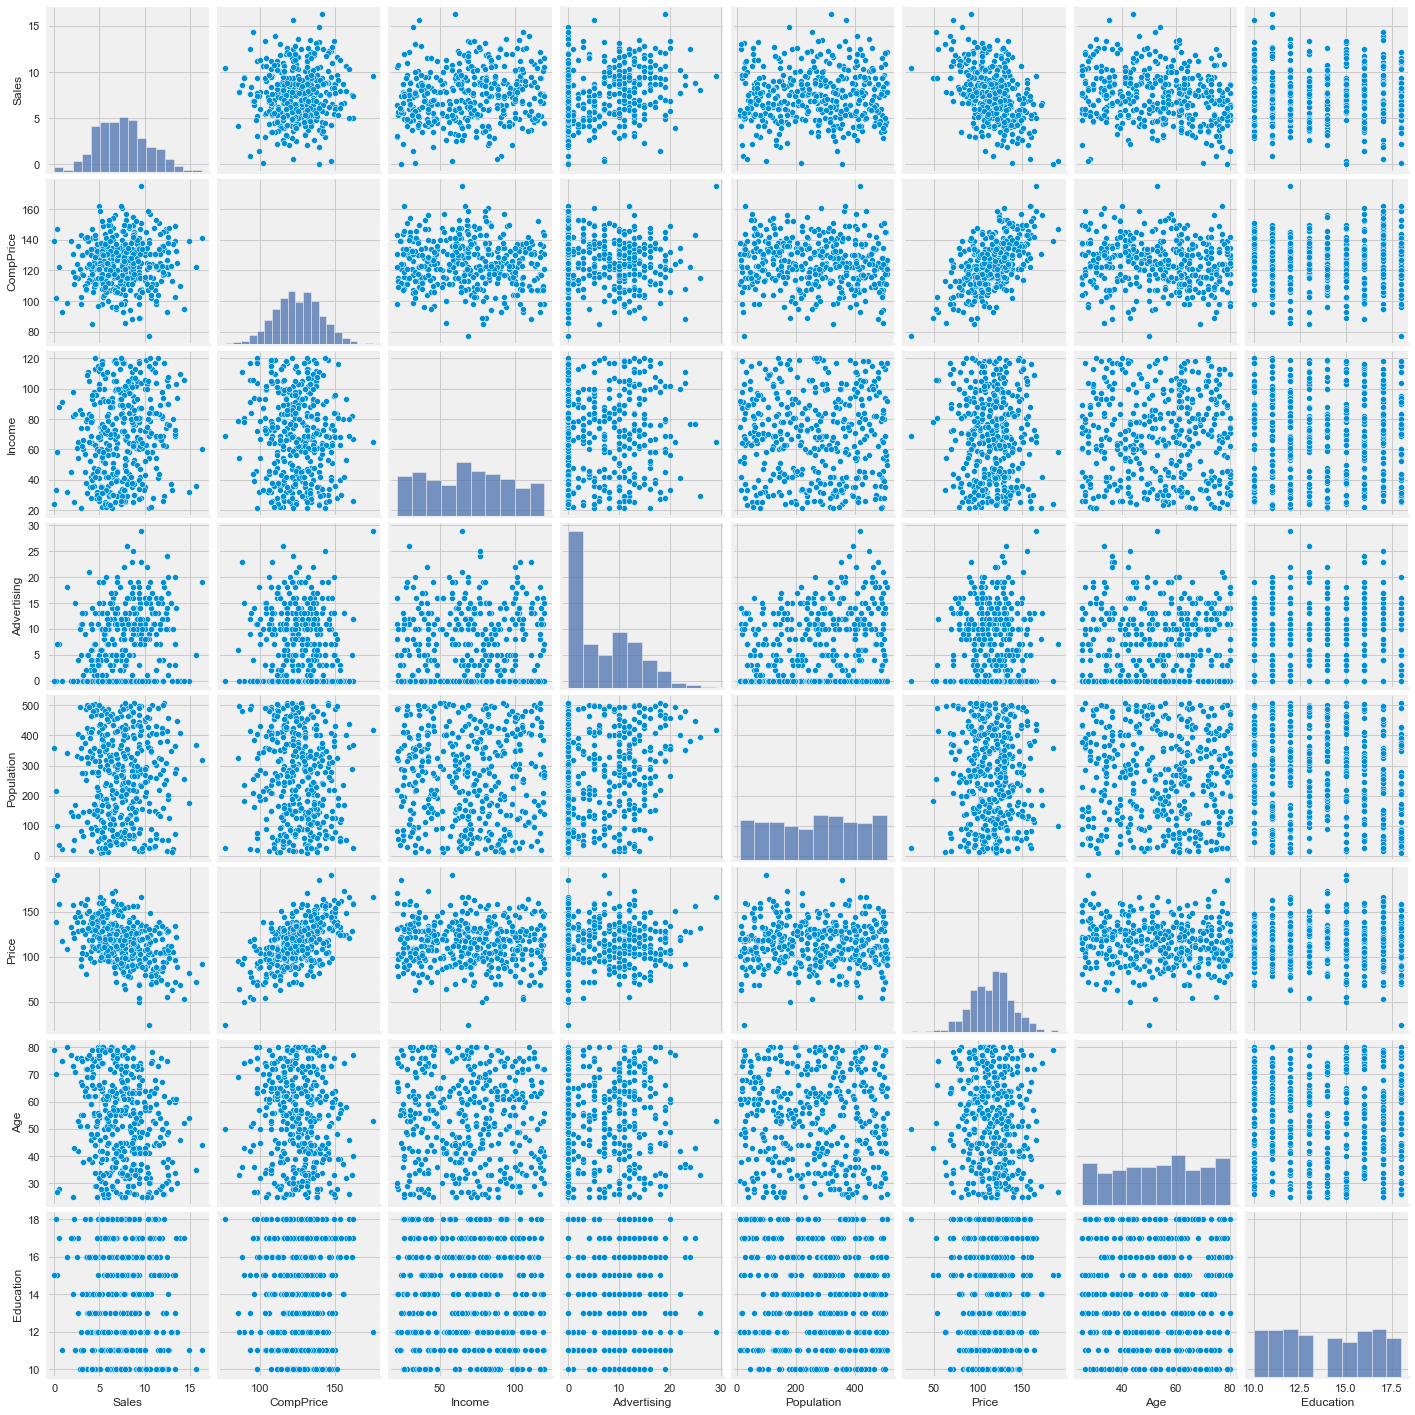

In [12]:

sns.pairplot(df)

<AxesSubplot:>

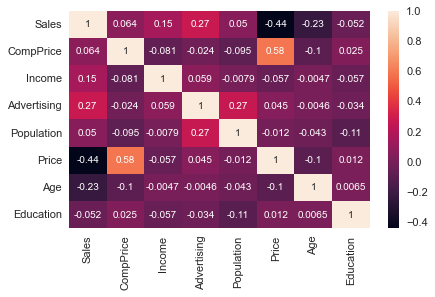

In [13]:
cor=df.corr()
sns.heatmap(cor,annot=True)

In [14]:
df.insert(11,'Sales_avg'," ")

for i in range(0,len(df['Sales']),1):
    if df['Sales'].iloc[i]<=7.5:
        df['Sales_avg'].iloc[i]='Low'
    else:
        df['Sales_avg'].iloc[i]='high'

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

In [15]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['US']=label_encoder.fit_transform(df['US'])
df['Sales_avg']= label_encoder.fit_transform(df['Sales_avg'])

In [16]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_avg
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [17]:
df.drop('Sales',axis=1,inplace=True)

In [18]:
x=df.iloc[:,0:-1]
y=df['Sales_avg']

In [19]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [20]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
model.score(x_test,y_test)

0.6375

# Using Grid search

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
model = DecisionTreeClassifier(random_state=42)

grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2, 10),
        }

search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=8, 
                             cv=5, verbose=1, return_train_score=True)

search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:    9.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 10)},
             return_train_score=True, verbose=1)

In [24]:
search.best_score_, search.best_params_

(0.765625, {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2})

In [25]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf= 2,random_state=0)

In [26]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=0)

In [27]:
y_pred=clf.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.725

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[33, 12],
       [10, 25]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.68      0.71      0.69        35

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.73      0.72      0.73        80



In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 0.840625
testing accuracy : 0.7875


Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

# Using KNN

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(df)

StandardScaler()

In [35]:
X=df.iloc[:,0:-1]
y=df['Sales_avg']

In [36]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales_avg, dtype: int32

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=12)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [41]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=12)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 0.7571428571428571
testing accuracy : 0.5916666666666667
